## Introduction
In this project I will do effective sampling of a dataset in order to make it easier to analyze. 

For this project, I am using data from the Environmental Protection Agency. I am analyzing data on air quality with respect to carbon monoxide—a major air pollutant. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name.

In [1]:
# Import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:

epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

### Examine the data


In [3]:
# First 10 rows of the data

epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [5]:
# table of some descriptive statistics
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


Overall aqi mean is 6.757 and there are 260 aqi measurements used.

In [6]:
#check mean aqi
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [13]:
#get 50 samples from data
sampled_data = epa_data.sample(n=50, replace = True, random_state = 42)
#random state allows for reproduction of the same sample if needed, or same rows 
#will be sampled each time the code is ran

Output the first 10 rows of the DataFrame. 

In [12]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


In [27]:
#mean of sample aqi
sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

Sample mean is different from the overall mean since the mean is just from a random sample of 50 different AQI values, not the mean of all 260, which is expected.

### How to apply the central limit theorem on the data

* I will create an empty list and assign it to a variable called `estimate_list`. 
* The iterate through a `for` loop 10,000 times. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. 
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [17]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

In [21]:
#create a dataframe for the estime_late
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df
#we did not assign a random_state, so the data will vary

,estimate
0,7.60
1,6.34
2,5.92
3,6.46
4,8.82
...,...
9995,5.84
9996,6.14
9997,5.88
9998,6.26


In [23]:
#find mean of the sample means
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.750366000000028

The mean found is 6.75, but as mentioned earlier can vary each time since no random_state was assigned.

Show the distribution and prove that random sampling and central limit theory are related.

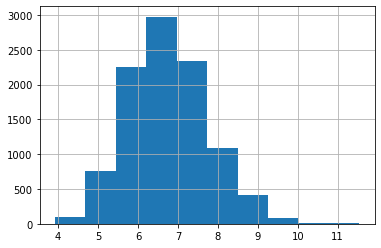

In [24]:
# plot a historgram
estimate_df['estimate'].hist()

Now I will find the standard error, a statistic that measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [25]:
standard_error = sampled_data['aqi'].std()/np.sqrt(len(sampled_data))
standard_error

0.7413225908290327

###  Visualize the relationship between the sampling and normal distributions

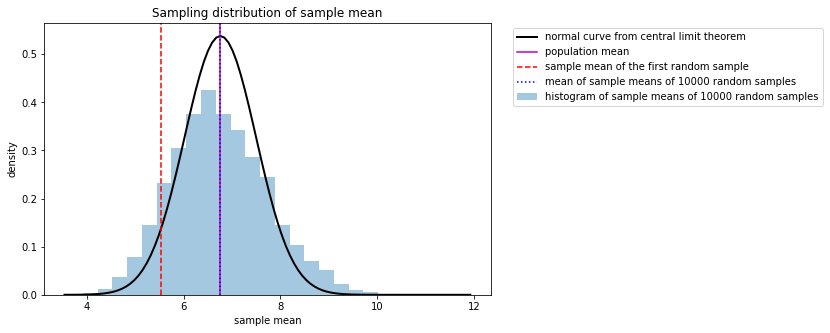

In [28]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

From this, we can see that the sampling distribution is well approximated by the normal distribution described by the central limit theory, as expected. 

The red dotted line, which is the mean found from one sample is off-centered. This is expected since there is sample variability.

There appears to be only one line in the center, but it is the actual population mean and the mean of the sample means overlapping. This means they are about equal.

# Findings

- Carbon monoxide levels are satisfactory in general, as an AQI at or below 100 is considered satisfactory.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions, since these are all considered satisfactory.




